In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from datetime import datetime 
import math



In [5]:
checkpoints_eoc = pd.read_csv("./full/checkpoints_eoc.csv")
page_views = pd.read_csv("./full/page_views.csv", low_memory=False)
media_views = pd.read_csv("./full/media_views.csv")

engaged = page_views["engaged"]
student_id = page_views["student_id"]
idle_brief = page_views["idle_brief"]
idle_long = page_views["idle_long"]

eoc = checkpoints_eoc["EOC"]
student_id = checkpoints_eoc["student_id"]
chapter_number = checkpoints_eoc["chapter_number"]

proportion_time = media_views["proportion_time"]
proportion_video = media_views["proportion_video"]
student_video = media_views["student_id"]



In [7]:
# __CHECKPOINTS_EOC_____________________________________
df = pd.DataFrame(checkpoints_eoc)

# Info for chapters 4 
filtered_df = df[df["chapter_number"] == 4].reset_index(drop=True)

# Students who've done these chapters (includes repeats ?)
student_vid_id_four = filtered_df["student_id"]

# Students eoc
student_vid_eoc_four = filtered_df["EOC"]

# Dict: student_id, eoc
vid_id_eoc_four = {}
for i in range(len(student_vid_id_four)):
    vid_id_eoc_four[student_vid_id_four[i]] =  student_vid_eoc_four[i]



# Info for chapters 5
filter_df = df[df["chapter_number"] == 5].reset_index(drop=True)

# Students who've done these chapters, unique
student_vid_id_five = filter_df["student_id"]

# Students eoc
student_vid_eoc_five = filter_df["EOC"]

# Dict: student_id, eoc
vid_id_eoc_five = {}
for i in range(len(student_vid_id_five)):
    vid_id_eoc_five[student_vid_id_five[i]] =  student_vid_eoc_five[i]




# __MEDIA_VIEWS_________________________________________

# Percent watched for all videos, has "NaN" 
percent_watched = media_views["proportion_video"]

# Same order as percent_watched
repeat_student_id = media_views["student_id"]


# 3xn array: student_id, sum of percentages, num media 
# student_sum_watch = {}

for i in range(len(percent_watched)):
    percent_watch = percent_watched[i]
    if math.isnan(percent_watch):
        percent_watch = 0
        
    student_id = repeat_student_id[i]
    
    if student_id in student_sum_watch:
        student_sum_watch[student_id][0] += min(1, percent_watch + student_sum_watch[student_id][0])
        student_sum_watch[student_id][1] += 1
    else:
        student_sum_watch[student_id] = [percent_watch, 1]

# 2xn array: student_id, avg percent they watch, num percents
student_avg_watched = {}
for student in student_sum_watch:
    student_avg_watched[student] = student_sum_watch[student][0]/student_sum_watch[student][1]

# _____________________________
eoc_four = {}
watch_four = {}

for student in student_avg_watched:
    if student in vid_id_eoc_four:
        eoc_four[student] = vid_id_eoc_four[student]
        watch_four[student] = student_avg_watched[student]

eoc_five = {}
watch_five = {}

for student in student_avg_watched:
    if student in vid_id_eoc_five:
        eoc_five[student] = vid_id_eoc_five[student]
        watch_five[student] = student_avg_watched[student]



Text(0.5, 1.0, 'Percentage of videos watched and performance')

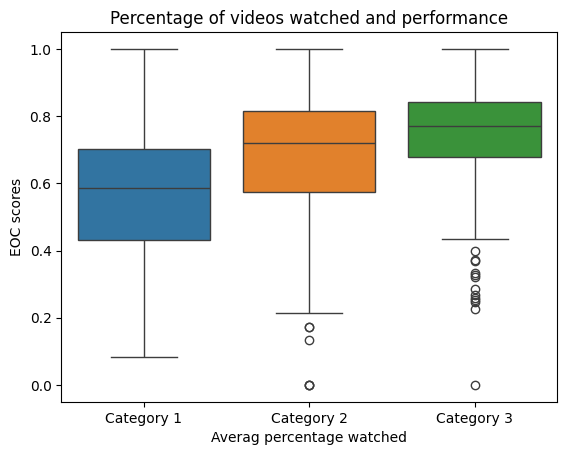

In [8]:

    
# ___BOX PLOTS________________________________________
category_1_eoc = {}
category_1_watch = {}
category_2_eoc = {}
category_2_watch = {}
category_3_eoc = {}
category_3_watch = {}


for student in eoc_five:
    if (len(category_1_eoc) < 424):
        category_1_eoc[student] = eoc_five[student]
        category_1_watch[student] = watch_five[student]
    elif (len(category_2_eoc) < 424):
        category_2_eoc[student] = eoc_five[student]
        category_2_watch[student] = watch_five[student]
    elif (len(category_3_eoc) < 424):
        category_3_eoc[student] = eoc_five[student]
        category_3_watch[student] = watch_five[student]
        
    
data = pd.DataFrame({'Category 1': list(category_3_eoc.values()),
                     'Category 2': list(category_2_eoc.values()),
                     'Category 3': list(category_1_eoc.values())})

fig, ax = plt.subplots()
sns.boxplot(data = data, ax=ax)


plt.xlabel('Averag percentage watched')
plt.ylabel('EOC scores')
plt.title('Percentage of videos watched and performance')

# plt.xticks([1,2],['Chapter 4', 'Chapter 5'])
# data = [list(eoc_four.values()), list(watch_four.values())]
# plt.boxplot(data)

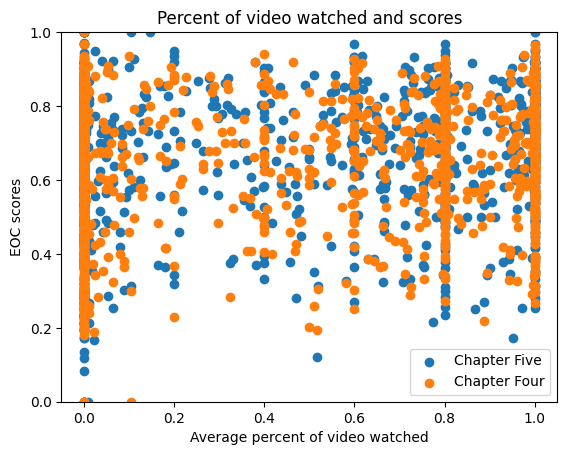

In [14]:
# SCATTER PLOTS ________________
# Scores vs percentaage of video watched
y = eoc_five.values()
x = watch_five.values()
plt.scatter(x, y, label='Chapter Five')
plt.ylim(0, 1)
plt.ylabel('EOC scores')
plt.xlabel('Average percent of video watched')
plt.title('Percent of video watched and scores')

plt.legend()

# SCATTER PLOTS ________________
# Scores vs percentaage of video watched
y = eoc_four.values()
x = watch_four.values()
plt.scatter(x, y, label='Chapter Four')
plt.ylim(0, 1)
plt.ylabel('EOC scores')
plt.xlabel('Average percent of video watched')
plt.title('Percent of video watched and scores')

plt.legend()

In [ ]:

# __AVG LINE GRAPH________________________________________

# # Scores vs percentaage of video watched
x = list(watch_four.values())
y = list(eoc_four.values())
# Create a dictionary to store the average y-values for each x point
average_dict = {}

# Calculate the average of y-values for each x point
for i in range(len(x)):
    if x[i] in average_dict:
        average_dict[x[i]].append(y[i])
    else:
        average_dict[x[i]] = [y[i]]

# Calculate the overall average of y-values
overall_average_y = []
for val in average_dict:
    overall_average_y.append(np.mean(average_dict[val][0]))

plt.plot(x, overall_average_y,  label='Chapter Four')
plt.ylim(0, 1)
plt.ylabel('EOC scores')
plt.xlabel('Average percent of video watched')
plt.title('Chapter four percent of video watched and scores')

___________________

# Scores vs percentaage of video watched
y = eoc_five.values()
x = watch_five.values()
plt.scatter(x, y, label='Chapter Five')
plt.ylim(0, 1)
plt.ylabel('EOC scores')
plt.xlabel('Average percent of video watched')
plt.title('Percent of video watched and scores')

plt.legend()

In [ ]:

____SCATTER PLOTS________________________________________

# Scores vs percentaage of video watched
y = eoc_four.values()
x = watch_four.values()
plt.scatter(x, y,  label='Chapter Four')
plt.ylim(0, 1)
plt.ylabel('EOC scores')
plt.xlabel('Average percent of video watched')
plt.title('Chapter four percent of video watched and scores')

___________________

# Scores vs percentaage of video watched
y = eoc_five.values()
x = watch_five.values()
plt.scatter(x, y, label='Chapter Five')
plt.ylim(0, 1)
plt.ylabel('EOC scores')
plt.xlabel('Average percent of video watched')
plt.title('Percent of video watched and scores')

plt.legend()


In [57]:
df = pd.DataFrame(media_views)

# Info for access_count = 1
filtered_df = df[df["access_count"] >= 1]

# Students who've watched once, with repeats
watched_once_id = filtered_df["student_id"]

# Amount of time spent watching in seconds
time_watched = []
for index, row in filtered_df.iterrows():
    iso_start = row["dt_started"]
    iso_end = row["dt_last_event"]
    datetime_start = datetime.fromisoformat(iso_start)
    datetime_end = datetime.fromisoformat(iso_end)
    time_watched.append((datetime_end - datetime_start).seconds)

# Percent of video watched
percent_watched = filtered_df["proportion_video"]

# Approximate video length via mean
time_array = np.array(time_watched)
percent_array = np.array(percent_watched)
video_length_approx = time_array * percent_array

# Video ids
media_id = filtered_df["media_id"]



# 3xn array: media_id, sum watch times and total occurences
video_dict = {}
index = 0
for id in media_id:
    if id in video_dict:
        video_dict[id][0] += video_length_approx[index]
        video_dict[id][1] += 1
    else:
        video_dict[id] = [video_length_approx[index], 1]
    
    index += 1

# Video length per media
video_length = {}
for id in video_dict:
    if id in video_length: 
        continue
    else:
        video_length[id]= video_dict[id][0]/video_dict[id][1]


In [ ]:

# ________________________________________________________
# Sum of all eoc scores [chapter 1-16][sum eoc][num students]
# 3xn array
chapter_eoc_sum = {}
for chapter in range(1, 17):
    chapter_eoc_sum[chapter] = [0, 0]
    
for index in range(len(eoc)):
    score = eoc[index]
    if math.isnan(score) or math.isinf(score):
        continue
    else:
        chapter_eoc_sum[chapter_number[index]][0] += score
        chapter_eoc_sum[chapter_number[index]][1] += 1

# Average eoc per chapter
chapter_eoc = []
for chapter in chapter_eoc_sum:
    chapter_eoc.append(chapter_eoc_sum[chapter][0]/chapter_eoc_sum[chapter][1])

# _____________________________________________
# Scores vs chapter
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
y = chapter_eoc

slope, intercept = np.polyfit(x, y, 1)
line_of_best_fit = slope * np.array(x) + intercept

# Calculate the R-squared value
residuals = y - line_of_best_fit
ss_residuals = np.sum(residuals**2)
ss_total = np.sum((y - np.mean(y))**2)
r_squared = 1 - (ss_residuals / ss_total)
plt.text(0.5, 0.9, f'R-squared = {r_squared:.2f}', transform=plt.gca().transAxes)

plt.plot(x, line_of_best_fit, color='red', label='Line of Best Fit')
plt.scatter(x, y)
plt.ylim(0, 1)
plt.ylabel('Average EOC percent')
plt.xlabel('Chapter')
plt.title('Average score per chapter')


